Problem Statement:
 The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"C:\Users\polasasuresh\pythonfiles\titanic1.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Here Columns:
PaeengerId:represents the unique number given to each passenger
Survived:represents the passenger who travelled in the ship were survived or not when the ship sinks.0 means not survived,1 means Survived
Pclass:represents Passengers class,there are 3 classes 1,2,3
Name:represents the Passengers Name
Sex: represents the Passenger gender male/female
Age:represents the Age of the passengers who travelled in the ship
SibSP:represents Siblings(brother/sister),spouse(Husband/wife) of the family in the ship
parch:represents the No of parents/childrens in the ship
Ticket:represents the Ticket number
Fare represents the price of the Ticket
Cabin:represents the cabin number
Embarked  represents the port of Embarkation: C=Cherbourg,Q=Queenstown,S=Southampton     

The data consists of PassengerId,Survived,Pclass,SibSp,Parch are of Numerical Type
Name,sex,Ticket,Cabin are of type categeorical
Age,Fare are of continuous type

# EDA

In [3]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

There are 12 columns

In [4]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

There are 12 columns with int,float and object type datatypes

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


Age,Fare of type float,PasssengerId,Survived,Pclass,SibSp,Parch are of type intger,Name,Sex,Ticket,Fare of type Object

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age, cabin,Embarked columns consist of some null values,so we have to fill these null values

In [7]:
#fill null values of age column with mean of that column
df['Age'].fillna(value=df['Age'].mean(),inplace=True)

'Cabin' column consist more number of null values so we can drop that column 

In [8]:
#As Embarked is a categeorical column so can fill null values with mode of that column
df['Embarked'].fillna(value=df['Embarked'].mode()[0],inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [10]:
#droping the Cabin column consisting of more null values.
df.drop(['Cabin'],axis=1,inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 62.7+ KB


In [12]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

There are no null values in the dataset

<AxesSubplot:>

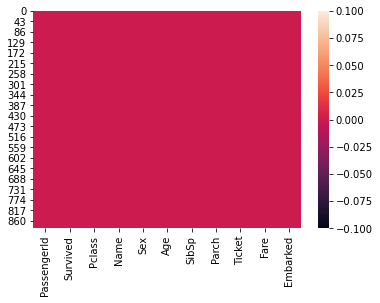

In [13]:
#we can plot is there any missing data present in the data
sns.heatmap(df.isnull())

There is no missing data present

# Finding Number of males and female survived

In [14]:
groups=df.groupby(['Sex'])
groups.sum()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,135343,233,678,8860.053235,218,204,13966.6628
male,262043,109,1379,17601.860588,248,136,14727.2865


Females are Survived 233 and males are 109 members survived

# percentage of survived and not survived basing on gender

In [15]:
df.groupby(['Sex'])['Survived'].value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

Feamles survived are 233, not survived are 81,Males survived are 109, not survived are 468 members

# Average Fare for every class

In [16]:
df.groupby(['Pclass'])['Fare'].mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

for PClass 1 the average Fare is 84.154687, for Pclass2 the average fare is 20.662183 and for Pclass3 the average Fare is 13.675550

# DataVisualization

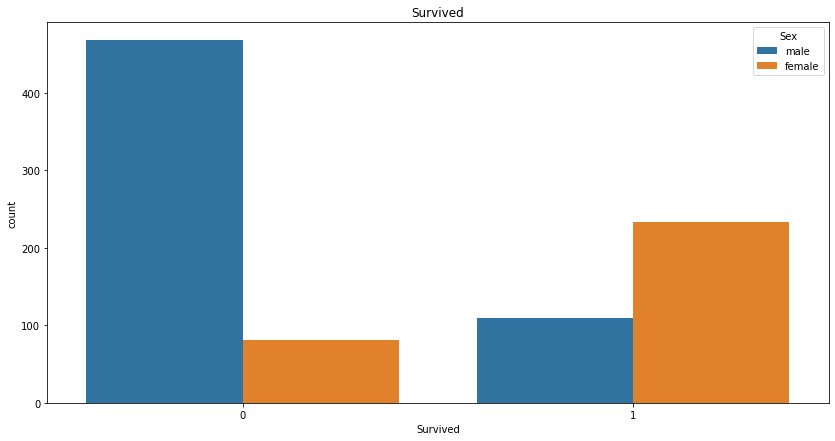

0    549
1    342
Name: Survived, dtype: int64


In [17]:
#Count plot showing how many members survived
plt.figure(figsize=(14,7))
sns.countplot(data=df,x='Survived',hue='Sex')
plt.title("Survived")
plt.xlabel("Survived")
plt.show()
print(df['Survived'].value_counts())

As 0 means 'Died' and '1' means 'Survived'
From the above count plot 549 members are died and 342 members are survived

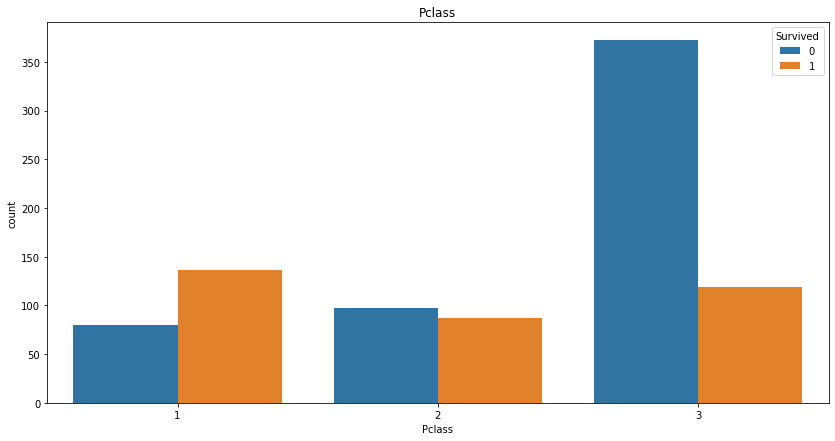

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64


In [18]:
#Count plot showing how many members of Pclass
plt.figure(figsize=(14,7))
sns.countplot(data=df,x='Pclass',hue='Survived')
plt.title("Pclass")
plt.xlabel("Pclass")
plt.show()
print(df.groupby(['Pclass'])['Survived'].value_counts())

From the above graph in
in P1class 216 members are there in this 136 are survived,80 are not survived
in P2class 184 members are there, in this 87 are survived,97 are not survived
in P3 class 491 members present,in this 119 are survived,372 are not survived

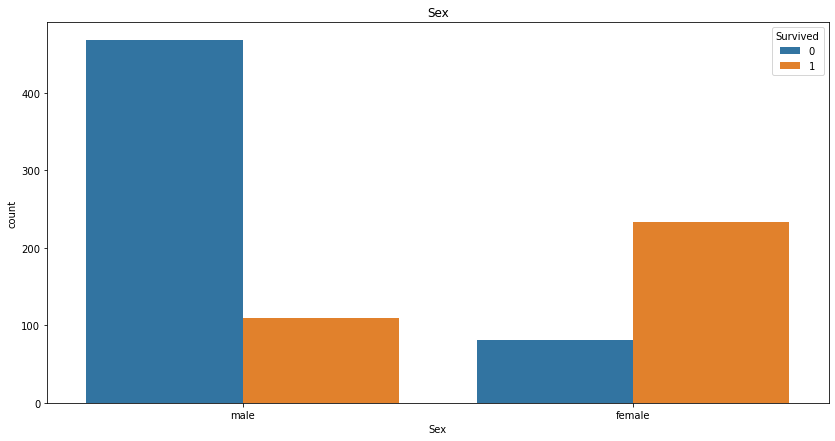

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64


In [19]:
#Count plot showing Sex
plt.figure(figsize=(14,7))
sns.countplot(data=df,x='Sex',hue='Survived')
plt.title("Sex")
plt.xlabel("Sex")
plt.show()
print(df.groupby(['Sex'])['Survived'].value_counts())

Total "male" are 577 and in this 468 member died and 109 members survived
"female" are 314 in the dataset in this 233 were survived and 81 were died

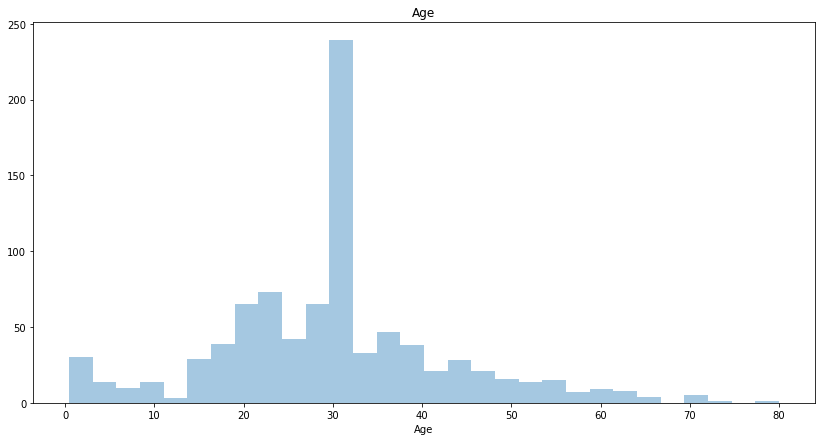

29.699118    177
24.000000     30
22.000000     27
18.000000     26
30.000000     25
            ... 
53.000000      1
55.500000      1
0.920000       1
24.500000      1
70.500000      1
Name: Age, Length: 89, dtype: int64


In [20]:
#Count plot showing Age
plt.figure(figsize=(14,7))
sns.distplot(df['Age'],kde=False,bins=30)
plt.title("Age")
plt.xlabel("Age")
plt.show()
print(df['Age'].value_counts())

From the above graph 177 members are having age of 29,30 members having age of 24,27 members having age of 22,70's age group only 1 person

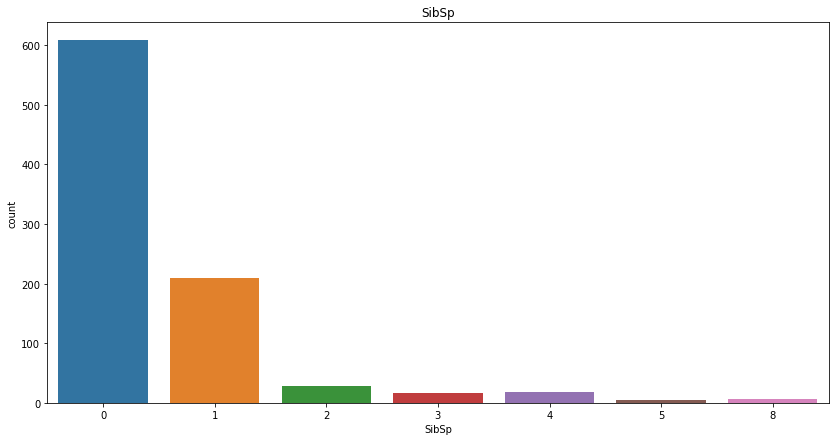

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


In [21]:
#Count plot showing Siblings/Spouse
plt.figure(figsize=(14,7))
sns.countplot(df['SibSp'])
plt.title("SibSp")
plt.xlabel("SibSp")
plt.show()
print(df['SibSp'].value_counts())

608 members do not have sibling/spouse,209 members having 1 sibSp

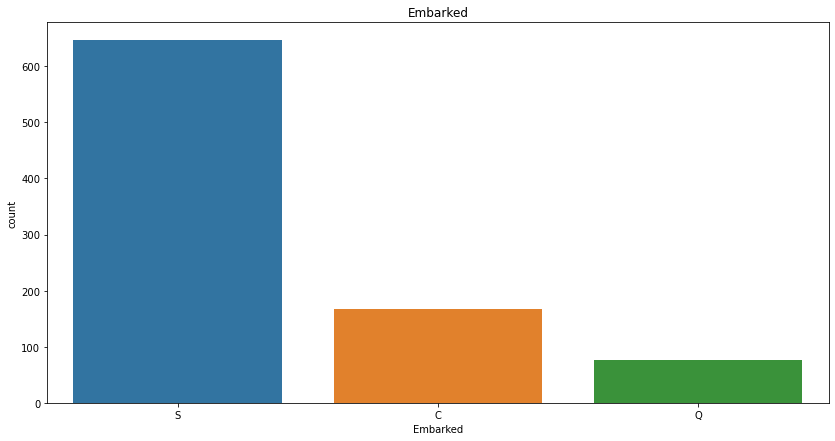

S    646
C    168
Q     77
Name: Embarked, dtype: int64


In [22]:
#Count plot showing Embarked
plt.figure(figsize=(14,7))
sns.countplot(df['Embarked'])
plt.title("Embarked")
plt.xlabel("Embarked")
plt.show()
print(df['Embarked'].value_counts())

646 members belongs to Embarke'S', 168 members belongs to Embarked'C', 77 members belongs to Embarked'Q'

# BivariateAnanlysis

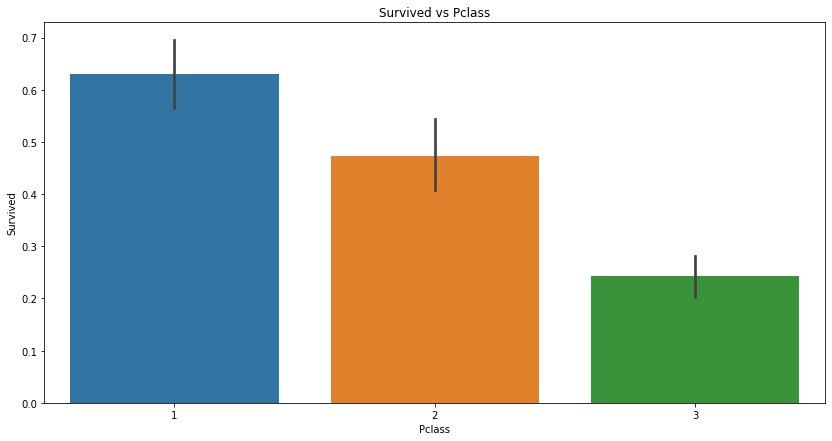

In [23]:
#servived vs pclass

plt.figure(figsize=(14,7))
sns.barplot(x='Pclass',y='Survived',data=df)
plt.title("Survived vs Pclass")
plt.xlabel("Pclass")
plt.ylabel("Survived")
plt.show()


Here Survived=0 means "died",Survived=1 means the people are survived

Passenger Class1 people are having highest survival rate than Passengers of class2,3 

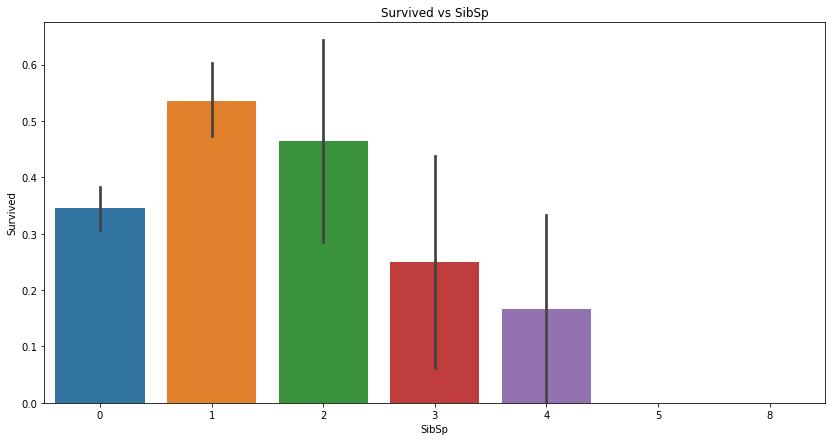

In [24]:
#servived vs SibSip

plt.figure(figsize=(14,7))
sns.barplot(x='SibSp',y='Survived',data=df)
plt.title("Survived vs SibSp")
plt.xlabel("SibSp")
plt.ylabel("Survived")
plt.show()

no.of Siblings/spouse features shows that passengers with only one family having highest survival rate

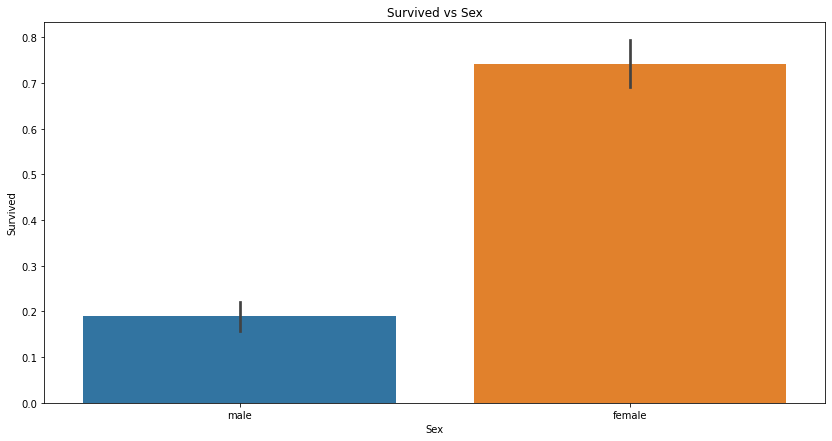

In [25]:
#servived vs Sex

plt.figure(figsize=(14,7))
sns.barplot(x='Sex',y='Survived',data=df)
plt.title("Survived vs Sex")
plt.xlabel("Sex")
plt.ylabel("Survived")
plt.show()

Male=1,Female=0,Then females are more survived than male

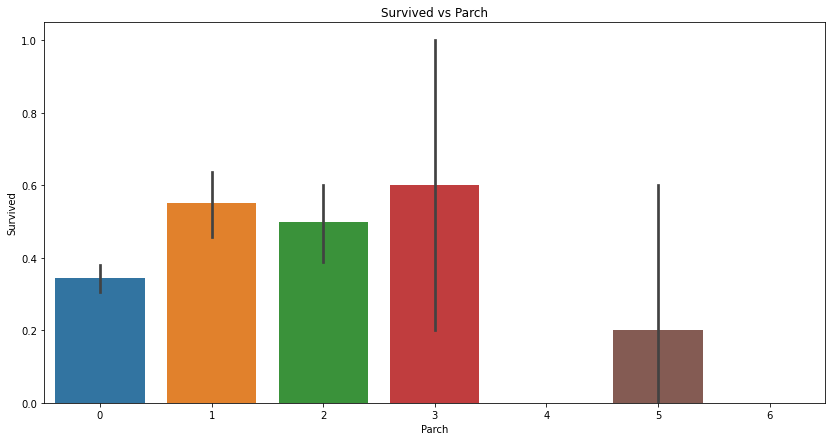

In [26]:
#servived vs Parch

plt.figure(figsize=(14,7))
sns.barplot(x='Parch',y='Survived',data=df)
plt.title("Survived vs Parch")
plt.xlabel("Parch")
plt.ylabel("Survived")
plt.show()

parents/children with 3 are survived more

<AxesSubplot:xlabel='Pclass', ylabel='Density'>

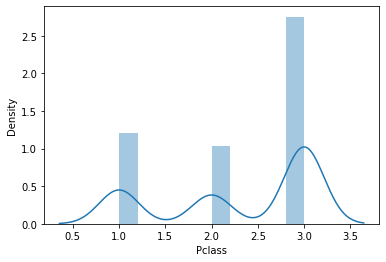

In [27]:
sns.distplot(df['Pclass'])


<AxesSubplot:xlabel='Survived', ylabel='Density'>

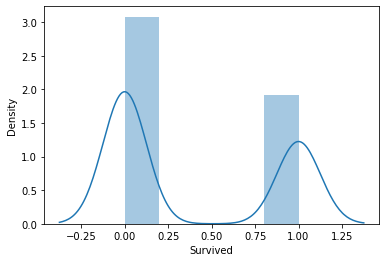

In [28]:
sns.distplot(df['Survived'])

In [29]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


<AxesSubplot:>

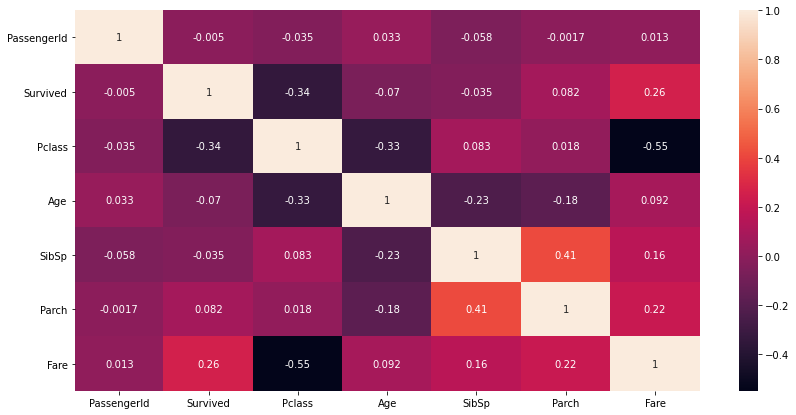

In [30]:
plt.figure(figsize=(14,7))
sns.heatmap(df.corr(),annot=True)

Fare is 26% correlated with Survived
Sibsp is 41% correlated with Parch
Parch is 8% correlated with Survived
The other features Passengerid,Pclass,Age,SibSp are negatively correlated

# Outliers Checking

PassengerId       AxesSubplot(0.125,0.536818;0.168478x0.343182)
Survived       AxesSubplot(0.327174,0.536818;0.168478x0.343182)
Pclass         AxesSubplot(0.529348,0.536818;0.168478x0.343182)
Age            AxesSubplot(0.731522,0.536818;0.168478x0.343182)
SibSp                AxesSubplot(0.125,0.125;0.168478x0.343182)
Parch             AxesSubplot(0.327174,0.125;0.168478x0.343182)
Fare              AxesSubplot(0.529348,0.125;0.168478x0.343182)
dtype: object

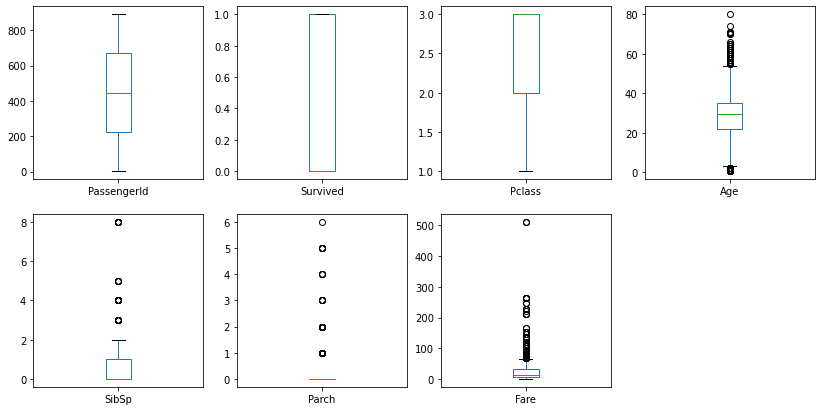

In [31]:
df.plot(kind='box',subplots=True,layout=(2,4),figsize=(14,7))

Age,SibSp,Parch having the outliers

In [32]:
df.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.434488
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64

As skewness is +/-0.5 SibSp,Parch and Fare values are above the skewness

# Encoding the DataFrame

Our dataset consist of Some Numerical and Some categeorical data, As the machine understands only numerical data so, we covert out dataset into numerical type by using the Ordinal encoding

In [33]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=oe.fit_transform(df[i].values.reshape(-1,1))
df    

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,108.0,1.0,22.000000,1,0,523.0,7.2500,2.0
1,2,1,1,190.0,0.0,38.000000,1,0,596.0,71.2833,0.0
2,3,1,3,353.0,0.0,26.000000,0,0,669.0,7.9250,2.0
3,4,1,1,272.0,0.0,35.000000,1,0,49.0,53.1000,2.0
4,5,0,3,15.0,1.0,35.000000,0,0,472.0,8.0500,2.0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548.0,1.0,27.000000,0,0,101.0,13.0000,2.0
887,888,1,1,303.0,0.0,19.000000,0,0,14.0,30.0000,2.0
888,889,0,3,413.0,0.0,29.699118,1,2,675.0,23.4500,2.0
889,890,1,1,81.0,1.0,26.000000,0,0,8.0,30.0000,0.0


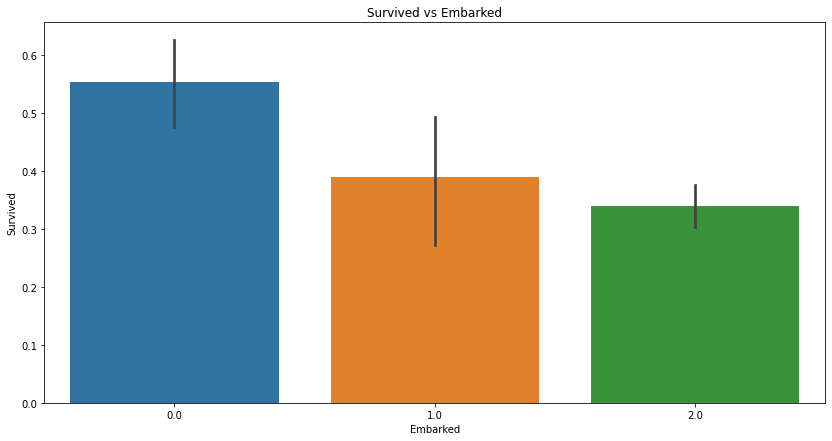

In [34]:
#servived vs Embarked
#C=0.0,Q=1.0,S=2.0
plt.figure(figsize=(14,7))
sns.barplot(x='Embarked',y='Survived',data=df)
plt.title("Survived vs Embarked")
plt.xlabel("Embarked")
plt.ylabel("Survived")
plt.show()

After encoding Embarked'C'=0,Embarked'Q'=1 and Embarked 'S'=2,so Embarked'C' passengers are survived more

# Describing the Dataset

In [35]:
df.describe()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,445.000000,0.647587,29.699118,0.523008,0.381594,338.528620,32.204208,1.536476
std,257.353842,0.486592,0.836071,257.353842,0.477990,13.002015,1.102743,0.806057,200.850657,49.693429,0.791503
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,222.500000,0.000000,22.000000,0.000000,0.000000,158.500000,7.910400,1.000000
50%,446.000000,0.000000,3.000000,445.000000,1.000000,29.699118,0.000000,0.000000,337.000000,14.454200,2.000000
75%,668.500000,1.000000,3.000000,667.500000,1.000000,35.000000,1.000000,0.000000,519.500000,31.000000,2.000000
max,891.000000,1.000000,3.000000,890.000000,1.000000,80.000000,8.000000,6.000000,680.000000,512.329200,2.000000


Here descibe() method gives the mean of the perticular columns, std, min and max of the columns,and it also gives howmuch data is distributed into quartiles

In [36]:
df.corr()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,-0.038559,0.042939,0.033207,-0.057527,-0.001652,-0.056554,0.012658,0.013128
Survived,-0.005007,1.000000,-0.338481,-0.057343,-0.543351,-0.069809,-0.035322,0.081629,-0.164549,0.257307,-0.167675
Pclass,-0.035144,-0.338481,1.000000,0.052831,0.131900,-0.331339,0.083081,0.018443,0.319869,-0.549500,0.162098
Name,-0.038559,-0.057343,0.052831,1.000000,0.020314,0.057466,-0.017230,-0.049105,0.047348,-0.049173,-0.006117
Sex,0.042939,-0.543351,0.131900,0.020314,1.000000,0.084153,-0.114631,-0.245489,0.059372,-0.182333,0.108262
Age,0.033207,-0.069809,-0.331339,0.057466,0.084153,1.000000,-0.232625,-0.179191,-0.068848,0.091566,-0.026749
SibSp,-0.057527,-0.035322,0.083081,-0.017230,-0.114631,-0.232625,1.000000,0.414838,0.079461,0.159651,0.068230
Parch,-0.001652,0.081629,0.018443,-0.049105,-0.245489,-0.179191,0.414838,1.000000,0.020003,0.216225,0.039798
Ticket,-0.056554,-0.164549,0.319869,0.047348,0.059372,-0.068848,0.079461,0.020003,1.000000,-0.013885,-0.001729
Fare,0.012658,0.257307,-0.549500,-0.049173,-0.182333,0.091566,0.159651,0.216225,-0.013885,1.000000,-0.224719


from the correlation matrix we observe that Fare and Parch are positely correlated with Survived column and remaining all the columns are negatively correlated

<AxesSubplot:>

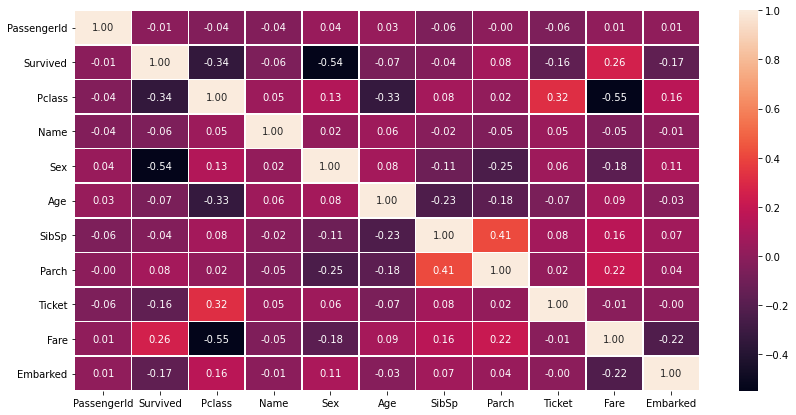

In [37]:
plt.figure(figsize=(14,7))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,fmt='0.2f')

Fare is 26% correlated with Survived Sibsp is 41% correlated with Parch Parch is 8% correlated with Survived The other features Passengerid,Pclass,Age,SibSp are negatively correlated

# outliers removal

Here we removing Outliers present in the data using Zscore method

In [38]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([ 13,  16,  25,  27,  50,  59,  68,  71,  86,  88,  96, 116, 118,
        119, 159, 164, 167, 171, 180, 182, 201, 233, 258, 261, 266, 278,
        299, 311, 324, 341, 360, 377, 380, 386, 437, 438, 438, 480, 493,
        527, 541, 542, 557, 567, 610, 630, 638, 672, 678, 679, 683, 686,
        689, 700, 716, 730, 736, 737, 742, 745, 774, 779, 787, 792, 813,
        824, 846, 850, 851, 858, 863, 885], dtype=int32),
 array([7, 6, 7, 9, 6, 6, 6, 6, 7, 9, 5, 5, 9, 6, 6, 6, 7, 6, 6, 6, 6, 6,
        9, 6, 6, 6, 9, 9, 6, 9, 7, 9, 9, 6, 7, 7, 9, 6, 5, 9, 6, 6, 9, 7,
        7, 5, 7, 5, 7, 9, 6, 6, 9, 9, 9, 9, 7, 9, 9, 5, 7, 9, 6, 6, 6, 6,
        6, 6, 5, 7, 6, 7], dtype=int32))

In [39]:
df_new=df[(z<3).all(axis=1)]

df_new is the new dataset consisting of all the values below the threshold value 3

In [40]:
df_new

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,108.0,1.0,22.000000,1,0,523.0,7.2500,2.0
1,2,1,1,190.0,0.0,38.000000,1,0,596.0,71.2833,0.0
2,3,1,3,353.0,0.0,26.000000,0,0,669.0,7.9250,2.0
3,4,1,1,272.0,0.0,35.000000,1,0,49.0,53.1000,2.0
4,5,0,3,15.0,1.0,35.000000,0,0,472.0,8.0500,2.0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548.0,1.0,27.000000,0,0,101.0,13.0000,2.0
887,888,1,1,303.0,0.0,19.000000,0,0,14.0,30.0000,2.0
888,889,0,3,413.0,0.0,29.699118,1,2,675.0,23.4500,2.0
889,890,1,1,81.0,1.0,26.000000,0,0,8.0,30.0000,0.0


In [41]:
print("old dataframe",df.shape)
print("new dataframe",df_new.shape)
print("total dropped rows",df.shape[0]-df_new.shape[0])

old dataframe (891, 11)
new dataframe (820, 11)
total dropped rows 71


In [42]:
data_loss=((891-820)/891)*100
data_loss

7.968574635241302

we loss 7.9% of data

In [43]:
df_new.skew()

PassengerId    0.003454
Survived       0.450825
Pclass        -0.632242
Name           0.010147
Sex           -0.664152
Age            0.318314
SibSp          1.979577
Parch          2.122629
Ticket         0.039240
Fare           2.318761
Embarked      -1.277386
dtype: float64

as the skewness is +/-0.5 SibSp,Parch,Fare are positevly skewd and Sex,Age,Embarked are negatively skewed

<AxesSubplot:xlabel='SibSp', ylabel='Density'>

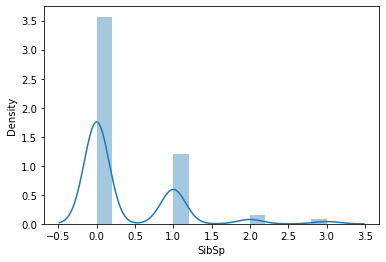

In [44]:
sns.distplot(df_new['SibSp'])

<AxesSubplot:xlabel='Parch', ylabel='Density'>

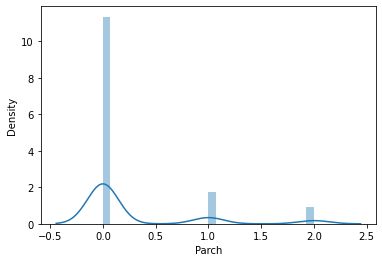

In [45]:
sns.distplot(df_new['Parch'])

<AxesSubplot:xlabel='Fare', ylabel='Density'>

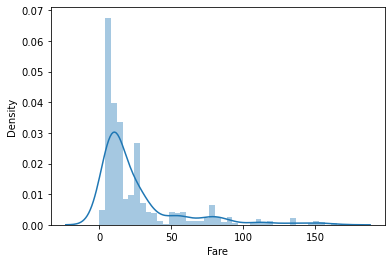

In [46]:
sns.distplot(df_new['Fare'])

<AxesSubplot:xlabel='Sex', ylabel='Density'>

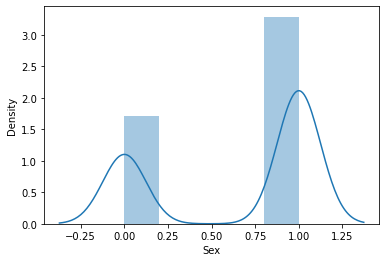

In [47]:
sns.distplot(df_new['Sex'])

<AxesSubplot:xlabel='Age', ylabel='Density'>

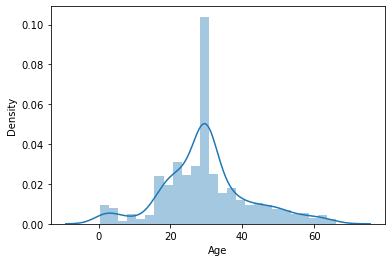

In [48]:
sns.distplot(df_new['Age'])

In [49]:
df_new.drop(['PassengerId'],axis=1,inplace=True)

In [50]:
df_new.drop(['Name','Ticket'],axis=1,inplace=True)

# Seperating the Columns int oFeatures and target

In [51]:
x=df_new.drop(['Survived'],axis=1)
y=df_new['Survived']

In [52]:
x.shape

(820, 7)

# Transforming data to remove skewness weuse power_transform method

In [53]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[ 0.87283049,  0.72203588, -0.61846778, ..., -0.48469263,
        -0.83470177,  0.60778719],
       [-1.47067587, -1.38497273,  0.68588353, ..., -0.48469263,
         1.55364494, -1.78767552],
       [ 0.87283049, -1.38497273, -0.28381447, ..., -0.48469263,
        -0.74331399,  0.60778719],
       ...,
       [ 0.87283049, -1.38497273,  0.0200539 , ...,  2.08665417,
         0.39490799,  0.60778719],
       [-1.47067587,  0.72203588, -0.28381447, ..., -0.48469263,
         0.65432009, -1.78767552],
       [ 0.87283049,  0.72203588,  0.20668289, ..., -0.48469263,
        -0.76629016, -1.24967343]])

In [54]:
pd.DataFrame(x).skew()

0   -0.429718
1   -0.664152
2    0.071813
3    0.948944
4    1.581505
5   -0.018602
6   -1.073724
dtype: float64

# Scaling the data using MinMaxScaler

In [55]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
x=mms.fit_transform(x)
x

array([[1.        , 1.        , 0.37161621, ..., 0.        , 0.44566706,
        1.        ],
       [0.        , 0.        , 0.61013203, ..., 0.        , 0.85522966,
        0.        ],
       [1.        , 0.        , 0.43281147, ..., 0.        , 0.46133858,
        1.        ],
       ...,
       [1.        , 0.        , 0.48837733, ..., 1.        , 0.65652513,
        1.        ],
       [0.        , 1.        , 0.43281147, ..., 0.        , 0.70101008,
        0.        ],
       [1.        , 1.        , 0.52250462, ..., 0.        , 0.45739854,
        0.22459213]])

# Checking VIF

In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(x,i) for i in range(x.shape[1])]
vif["features"]=pd.DataFrame(x).columns
vif

,vif,features
0,2.619784,0
1,3.169057,1
2,8.150190,2
3,1.811777,3
4,1.635336,4
5,9.995443,5
6,3.945576,6


All the VIF values are <10 so, we can consider all the columns

# ModelBuilding

Here our dataset is of Binary Classification,so we are using Logistic Regression for model Building

importing necessary libraries

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [58]:
lr=LogisticRegression()
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"At Random State {i} the training accuracy is:",accuracy_score(y_train,pred_train))
    print(f"At Random State {i} the testing accuracy is:",accuracy_score(y_test,pred_test))
    print("\n")
    

At Random State 0 the training accuracy is: 0.7835365853658537
At Random State 0 the testing accuracy is: 0.8292682926829268


At Random State 1 the training accuracy is: 0.788109756097561
At Random State 1 the testing accuracy is: 0.8109756097560976


At Random State 2 the training accuracy is: 0.788109756097561
At Random State 2 the testing accuracy is: 0.8109756097560976


At Random State 3 the training accuracy is: 0.8003048780487805
At Random State 3 the testing accuracy is: 0.7682926829268293


At Random State 4 the training accuracy is: 0.7911585365853658
At Random State 4 the testing accuracy is: 0.8170731707317073


At Random State 5 the training accuracy is: 0.8079268292682927
At Random State 5 the testing accuracy is: 0.7439024390243902


At Random State 6 the training accuracy is: 0.7942073170731707
At Random State 6 the testing accuracy is: 0.7987804878048781


At Random State 7 the training accuracy is: 0.7957317073170732
At Random State 7 the testing accuracy is: 0.79878

At Random State 64 the testing accuracy is: 0.7195121951219512


At Random State 65 the training accuracy is: 0.7957317073170732
At Random State 65 the testing accuracy is: 0.7926829268292683


At Random State 66 the training accuracy is: 0.7896341463414634
At Random State 66 the testing accuracy is: 0.8170731707317073


At Random State 67 the training accuracy is: 0.7987804878048781
At Random State 67 the testing accuracy is: 0.7804878048780488


At Random State 68 the training accuracy is: 0.8033536585365854
At Random State 68 the testing accuracy is: 0.7682926829268293


At Random State 69 the training accuracy is: 0.7987804878048781
At Random State 69 the testing accuracy is: 0.7682926829268293


At Random State 70 the training accuracy is: 0.8079268292682927
At Random State 70 the testing accuracy is: 0.7621951219512195


At Random State 71 the training accuracy is: 0.801829268292683
At Random State 71 the testing accuracy is: 0.7987804878048781


At Random State 72 the training a

At Random State 129 the training accuracy is: 0.8048780487804879
At Random State 129 the testing accuracy is: 0.7682926829268293


At Random State 130 the training accuracy is: 0.7957317073170732
At Random State 130 the testing accuracy is: 0.7987804878048781


At Random State 131 the training accuracy is: 0.8109756097560976
At Random State 131 the testing accuracy is: 0.75


At Random State 132 the training accuracy is: 0.7972560975609756
At Random State 132 the testing accuracy is: 0.7987804878048781


At Random State 133 the training accuracy is: 0.7926829268292683
At Random State 133 the testing accuracy is: 0.7804878048780488


At Random State 134 the training accuracy is: 0.788109756097561
At Random State 134 the testing accuracy is: 0.823170731707317


At Random State 135 the training accuracy is: 0.8094512195121951
At Random State 135 the testing accuracy is: 0.7682926829268293


At Random State 136 the training accuracy is: 0.8048780487804879
At Random State 136 the testing ac

At Random State 201 the testing accuracy is: 0.8780487804878049


At Random State 202 the training accuracy is: 0.801829268292683
At Random State 202 the testing accuracy is: 0.774390243902439


At Random State 203 the training accuracy is: 0.7926829268292683
At Random State 203 the testing accuracy is: 0.7804878048780488


At Random State 204 the training accuracy is: 0.8064024390243902
At Random State 204 the testing accuracy is: 0.7804878048780488


At Random State 205 the training accuracy is: 0.7835365853658537
At Random State 205 the testing accuracy is: 0.8109756097560976


At Random State 206 the training accuracy is: 0.7926829268292683
At Random State 206 the testing accuracy is: 0.8170731707317073


At Random State 207 the training accuracy is: 0.8033536585365854
At Random State 207 the testing accuracy is: 0.7987804878048781


At Random State 208 the training accuracy is: 0.8003048780487805
At Random State 208 the testing accuracy is: 0.7804878048780488


At Random State 209

At Random State 265 the training accuracy is: 0.8033536585365854
At Random State 265 the testing accuracy is: 0.7682926829268293


At Random State 266 the training accuracy is: 0.7987804878048781
At Random State 266 the testing accuracy is: 0.75


At Random State 267 the training accuracy is: 0.7972560975609756
At Random State 267 the testing accuracy is: 0.8048780487804879


At Random State 268 the training accuracy is: 0.8033536585365854
At Random State 268 the testing accuracy is: 0.7865853658536586


At Random State 269 the training accuracy is: 0.7957317073170732
At Random State 269 the testing accuracy is: 0.7926829268292683


At Random State 270 the training accuracy is: 0.7865853658536586
At Random State 270 the testing accuracy is: 0.8292682926829268


At Random State 271 the training accuracy is: 0.7957317073170732
At Random State 271 the testing accuracy is: 0.7682926829268293


At Random State 272 the training accuracy is: 0.7820121951219512
At Random State 272 the testing 

At Random State 335 the testing accuracy is: 0.8170731707317073


At Random State 336 the training accuracy is: 0.7972560975609756
At Random State 336 the testing accuracy is: 0.7682926829268293


At Random State 337 the training accuracy is: 0.7911585365853658
At Random State 337 the testing accuracy is: 0.7865853658536586


At Random State 338 the training accuracy is: 0.7926829268292683
At Random State 338 the testing accuracy is: 0.7987804878048781


At Random State 339 the training accuracy is: 0.7972560975609756
At Random State 339 the testing accuracy is: 0.823170731707317


At Random State 340 the training accuracy is: 0.7896341463414634
At Random State 340 the testing accuracy is: 0.8048780487804879


At Random State 341 the training accuracy is: 0.8048780487804879
At Random State 341 the testing accuracy is: 0.774390243902439


At Random State 342 the training accuracy is: 0.788109756097561
At Random State 342 the testing accuracy is: 0.7865853658536586


At Random State 343 

At Random State 402 the testing accuracy is: 0.7987804878048781


At Random State 403 the training accuracy is: 0.7972560975609756
At Random State 403 the testing accuracy is: 0.7865853658536586


At Random State 404 the training accuracy is: 0.8033536585365854
At Random State 404 the testing accuracy is: 0.75


At Random State 405 the training accuracy is: 0.8109756097560976
At Random State 405 the testing accuracy is: 0.7682926829268293


At Random State 406 the training accuracy is: 0.7942073170731707
At Random State 406 the testing accuracy is: 0.7682926829268293


At Random State 407 the training accuracy is: 0.801829268292683
At Random State 407 the testing accuracy is: 0.7682926829268293


At Random State 408 the training accuracy is: 0.7835365853658537
At Random State 408 the testing accuracy is: 0.823170731707317


At Random State 409 the training accuracy is: 0.788109756097561
At Random State 409 the testing accuracy is: 0.8292682926829268


At Random State 410 the training a

At Random State 473 the training accuracy is: 0.7957317073170732
At Random State 473 the testing accuracy is: 0.8048780487804879


At Random State 474 the training accuracy is: 0.7972560975609756
At Random State 474 the testing accuracy is: 0.8048780487804879


At Random State 475 the training accuracy is: 0.7957317073170732
At Random State 475 the testing accuracy is: 0.8109756097560976


At Random State 476 the training accuracy is: 0.8048780487804879
At Random State 476 the testing accuracy is: 0.7560975609756098


At Random State 477 the training accuracy is: 0.7911585365853658
At Random State 477 the testing accuracy is: 0.7865853658536586


At Random State 478 the training accuracy is: 0.8003048780487805
At Random State 478 the testing accuracy is: 0.7804878048780488


At Random State 479 the training accuracy is: 0.8079268292682927
At Random State 479 the testing accuracy is: 0.7439024390243902


At Random State 480 the training accuracy is: 0.7957317073170732
At Random State 48

At Random State 537 the training accuracy is: 0.7926829268292683
At Random State 537 the testing accuracy is: 0.7865853658536586


At Random State 538 the training accuracy is: 0.7896341463414634
At Random State 538 the testing accuracy is: 0.7987804878048781


At Random State 539 the training accuracy is: 0.7987804878048781
At Random State 539 the testing accuracy is: 0.7865853658536586


At Random State 540 the training accuracy is: 0.7896341463414634
At Random State 540 the testing accuracy is: 0.8414634146341463


At Random State 541 the training accuracy is: 0.7926829268292683
At Random State 541 the testing accuracy is: 0.8170731707317073


At Random State 542 the training accuracy is: 0.7987804878048781
At Random State 542 the testing accuracy is: 0.7926829268292683


At Random State 543 the training accuracy is: 0.7926829268292683
At Random State 543 the testing accuracy is: 0.8048780487804879


At Random State 544 the training accuracy is: 0.8048780487804879
At Random State 54

At Random State 601 the testing accuracy is: 0.7621951219512195


At Random State 602 the training accuracy is: 0.7759146341463414
At Random State 602 the testing accuracy is: 0.8475609756097561


At Random State 603 the training accuracy is: 0.8003048780487805
At Random State 603 the testing accuracy is: 0.7987804878048781


At Random State 604 the training accuracy is: 0.7972560975609756
At Random State 604 the testing accuracy is: 0.8292682926829268


At Random State 605 the training accuracy is: 0.7957317073170732
At Random State 605 the testing accuracy is: 0.7865853658536586


At Random State 606 the training accuracy is: 0.801829268292683
At Random State 606 the testing accuracy is: 0.7804878048780488


At Random State 607 the training accuracy is: 0.7850609756097561
At Random State 607 the testing accuracy is: 0.8292682926829268


At Random State 608 the training accuracy is: 0.8064024390243902
At Random State 608 the testing accuracy is: 0.7682926829268293


At Random State 60

At Random State 671 the testing accuracy is: 0.8048780487804879


At Random State 672 the training accuracy is: 0.7987804878048781
At Random State 672 the testing accuracy is: 0.774390243902439


At Random State 673 the training accuracy is: 0.7926829268292683
At Random State 673 the testing accuracy is: 0.7926829268292683


At Random State 674 the training accuracy is: 0.7926829268292683
At Random State 674 the testing accuracy is: 0.7804878048780488


At Random State 675 the training accuracy is: 0.8079268292682927
At Random State 675 the testing accuracy is: 0.7560975609756098


At Random State 676 the training accuracy is: 0.8079268292682927
At Random State 676 the testing accuracy is: 0.7621951219512195


At Random State 677 the training accuracy is: 0.8048780487804879
At Random State 677 the testing accuracy is: 0.7560975609756098


At Random State 678 the training accuracy is: 0.7911585365853658
At Random State 678 the testing accuracy is: 0.8109756097560976


At Random State 67

At Random State 737 the training accuracy is: 0.7820121951219512
At Random State 737 the testing accuracy is: 0.8414634146341463


At Random State 738 the training accuracy is: 0.7789634146341463
At Random State 738 the testing accuracy is: 0.8353658536585366


At Random State 739 the training accuracy is: 0.7850609756097561
At Random State 739 the testing accuracy is: 0.8048780487804879


At Random State 740 the training accuracy is: 0.7835365853658537
At Random State 740 the testing accuracy is: 0.8353658536585366


At Random State 741 the training accuracy is: 0.8003048780487805
At Random State 741 the testing accuracy is: 0.7682926829268293


At Random State 742 the training accuracy is: 0.7972560975609756
At Random State 742 the testing accuracy is: 0.7987804878048781


At Random State 743 the training accuracy is: 0.7957317073170732
At Random State 743 the testing accuracy is: 0.8048780487804879


At Random State 744 the training accuracy is: 0.8079268292682927
At Random State 74

At Random State 809 the training accuracy is: 0.7926829268292683
At Random State 809 the testing accuracy is: 0.823170731707317


At Random State 810 the training accuracy is: 0.7987804878048781
At Random State 810 the testing accuracy is: 0.7682926829268293


At Random State 811 the training accuracy is: 0.7911585365853658
At Random State 811 the testing accuracy is: 0.823170731707317


At Random State 812 the training accuracy is: 0.7926829268292683
At Random State 812 the testing accuracy is: 0.8048780487804879


At Random State 813 the training accuracy is: 0.7926829268292683
At Random State 813 the testing accuracy is: 0.7804878048780488


At Random State 814 the training accuracy is: 0.788109756097561
At Random State 814 the testing accuracy is: 0.7987804878048781


At Random State 815 the training accuracy is: 0.7820121951219512
At Random State 815 the testing accuracy is: 0.8414634146341463


At Random State 816 the training accuracy is: 0.7987804878048781
At Random State 816 t

At Random State 873 the training accuracy is: 0.7896341463414634
At Random State 873 the testing accuracy is: 0.8170731707317073


At Random State 874 the training accuracy is: 0.7911585365853658
At Random State 874 the testing accuracy is: 0.8109756097560976


At Random State 875 the training accuracy is: 0.7942073170731707
At Random State 875 the testing accuracy is: 0.774390243902439


At Random State 876 the training accuracy is: 0.8048780487804879
At Random State 876 the testing accuracy is: 0.7865853658536586


At Random State 877 the training accuracy is: 0.7942073170731707
At Random State 877 the testing accuracy is: 0.7926829268292683


At Random State 878 the training accuracy is: 0.7896341463414634
At Random State 878 the testing accuracy is: 0.7926829268292683


At Random State 879 the training accuracy is: 0.7820121951219512
At Random State 879 the testing accuracy is: 0.8536585365853658


At Random State 880 the training accuracy is: 0.8079268292682927
At Random State 880

At Random State 936 the training accuracy is: 0.7804878048780488
At Random State 936 the testing accuracy is: 0.8475609756097561


At Random State 937 the training accuracy is: 0.7926829268292683
At Random State 937 the testing accuracy is: 0.8109756097560976


At Random State 938 the training accuracy is: 0.788109756097561
At Random State 938 the testing accuracy is: 0.8109756097560976


At Random State 939 the training accuracy is: 0.8033536585365854
At Random State 939 the testing accuracy is: 0.7439024390243902


At Random State 940 the training accuracy is: 0.7957317073170732
At Random State 940 the testing accuracy is: 0.7926829268292683


At Random State 941 the training accuracy is: 0.8064024390243902
At Random State 941 the testing accuracy is: 0.7560975609756098


At Random State 942 the training accuracy is: 0.7972560975609756
At Random State 942 the testing accuracy is: 0.7804878048780488


At Random State 943 the training accuracy is: 0.7865853658536586
At Random State 943

At Random State 23 the training accuracy is: 0.7987804878048781
At Random State 23 the testing accuracy is: 0.7987804878048781

# DecisionTreeClassifier

In [59]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print("Accuracy score is:",accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))
print("cross_validation_score is:",cross_val_score(dtc,x,y,cv=5).mean())

Accuracy score is: 0.75
[[79 27]
 [14 44]]
              precision    recall  f1-score   support

           0       0.85      0.75      0.79       106
           1       0.62      0.76      0.68        58

    accuracy                           0.75       164
   macro avg       0.73      0.75      0.74       164
weighted avg       0.77      0.75      0.75       164

cross_validation_score is: 0.7560975609756098


# Navie_Bayes

In [60]:
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB()
mnb.fit(x_train,y_train)
predmnb=mnb.predict(x_test)
print("accuracy score is",accuracy_score(y_test,predmnb))
print(confusion_matrix(y_test,predmnb))
print(classification_report(y_test,predmnb))
print("cross_validation_score is:",cross_val_score(mnb,x,y,cv=5).mean())

accuracy score is 0.7012195121951219
[[88 18]
 [31 27]]
              precision    recall  f1-score   support

           0       0.74      0.83      0.78       106
           1       0.60      0.47      0.52        58

    accuracy                           0.70       164
   macro avg       0.67      0.65      0.65       164
weighted avg       0.69      0.70      0.69       164

cross_validation_score is: 0.6951219512195121


# KNN

In [61]:

knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
print("Accuracy Score is:",accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))
print("cross_validation_score is:",cross_val_score(knn,x,y,cv=5).mean())

Accuracy Score is: 0.8353658536585366
[[93 13]
 [14 44]]
              precision    recall  f1-score   support

           0       0.87      0.88      0.87       106
           1       0.77      0.76      0.77        58

    accuracy                           0.84       164
   macro avg       0.82      0.82      0.82       164
weighted avg       0.83      0.84      0.84       164

cross_validation_score is: 0.8073170731707318


# SVC

In [62]:
from sklearn.svm import SVC
svc=SVC(kernel='rbf')
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print("Accuracy_score is:",accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))
print("cross_validation_score is:",cross_val_score(svc,x,y,cv=5).mean())

Accuracy_score is: 0.823170731707317
[[93 13]
 [16 42]]
              precision    recall  f1-score   support

           0       0.85      0.88      0.87       106
           1       0.76      0.72      0.74        58

    accuracy                           0.82       164
   macro avg       0.81      0.80      0.80       164
weighted avg       0.82      0.82      0.82       164

cross_validation_score is: 0.8134146341463415


In [63]:
from sklearn.svm import SVC
svc=SVC(kernel='poly')
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print("Accuracy score is:",accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))
print("cross_validation_score is:",cross_val_score(svc,x,y,cv=5).mean())

Accuracy score is: 0.8109756097560976
[[91 15]
 [16 42]]
              precision    recall  f1-score   support

           0       0.85      0.86      0.85       106
           1       0.74      0.72      0.73        58

    accuracy                           0.81       164
   macro avg       0.79      0.79      0.79       164
weighted avg       0.81      0.81      0.81       164

cross_validation_score is: 0.8146341463414636


# RandomFforestClassifier

In [64]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
predrfc=rfc.predict(x_test)
print("Accuracy score is:",accuracy_score(y_test,predrfc))
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))
print("cross_validation_score is:",cross_val_score(rfc,x,y,cv=5).mean())

Accuracy score is: 0.7987804878048781
[[89 17]
 [16 42]]
              precision    recall  f1-score   support

           0       0.85      0.84      0.84       106
           1       0.71      0.72      0.72        58

    accuracy                           0.80       164
   macro avg       0.78      0.78      0.78       164
weighted avg       0.80      0.80      0.80       164

cross_validation_score is: 0.8012195121951219


# GradientBoostingClassifier

In [65]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
predgbc=gbc.predict(x_test)
print("Accuracy score is:",accuracy_score(y_test,predgbc))
print(confusion_matrix(y_test,predgbc))
print(classification_report(y_test,predgbc))
print("cross_validation_score is:",cross_val_score(gbc,x,y,cv=5).mean())

Accuracy score is: 0.823170731707317
[[94 12]
 [17 41]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       106
           1       0.77      0.71      0.74        58

    accuracy                           0.82       164
   macro avg       0.81      0.80      0.80       164
weighted avg       0.82      0.82      0.82       164

cross_validation_score is: 0.8036585365853657


# Hyper Parameter Tuning

# svcGridsearchCV

In [71]:
from sklearn.model_selection import GridSearchCV
svmc=SVC(probability=True)
svc_param_grid={'kernel':['rbf'],
                'gamma':[0.01,0.1,1],
                'C':[1,50,100,300,1000]}
gssvmc=GridSearchCV(svmc,param_grid=svc_param_grid,cv=5)
gssvmc.fit(x_train,y_train)
svmc_best=gssvmc.best_estimator_

#Best score
gssvmc.best_score_


0.8063497571131159

In [72]:
RFC=RandomForestClassifier()
rf_param_grid={ "max_features":[3,10],
               "min_samples_split":[3,10],
               "min_samples_leaf":[3,10],
               "bootstrap":[False],
               "n_estimators":[100,300]}
gsRFC=GridSearchCV(RFC,param_grid=rf_param_grid,cv=5)
gsRFC.fit(x_train,y_train)
RFC_best=gsRFC.best_estimator_

gsRFC.best_score_

0.8246588017580384

# In RandomForestClassifier accuracy_score and cross_val_score both are 82.9268 so,we accept this model

# Model Saving

In [68]:
import pickle
filename='picklerfcfile.pkl'
pickle.dump(rfc,open(filename,'wb'))